1. **Correlating.** <font color = "RED">(関連付け)関連要素を見つけたい。</font>
1. **Completing.**<font color = "RED">(補完)関連要素っぽい、が、NaNがある要素は埋めておきたい。</font>
1. **Correcting.**<font color = "RED">(削除)補正という名の削除。いらないやつはdropしておきたい。</font>
1. **Creating.**<font color = "RED">(追加・簡略)Age bandsや複数要素の統合などして、簡潔にしておきたい。</font>
1. **Classifying.**<font color = "RED">(分類)その他、既存要素で分類できるものは、しておきたい。</font>

# pandas 前処理

__データ準備__

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("testdata/train.csv") #if no header, add ", header=None"
test_df = pd.read_csv("testdata/test.csv") #教師なし

In [3]:
combine = [train_df, test_df] # データラングリングで使う

In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


__データを見る__

In [7]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

__ヒートマップ ＆　相関関数__

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
#titanic[["survived","pclass"]]

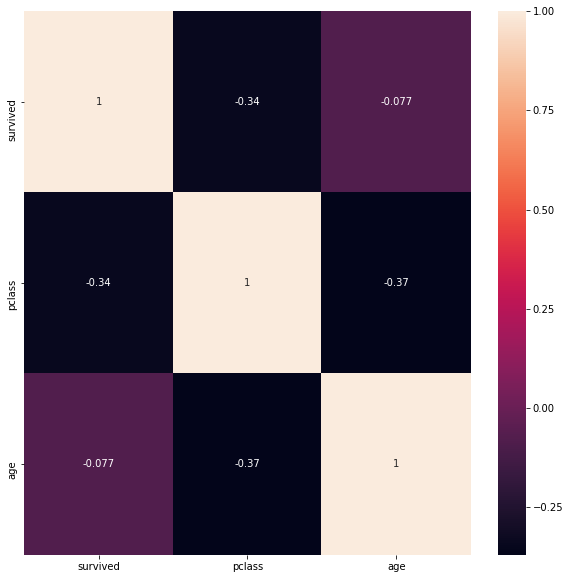

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic[['survived','pclass','sex','age']].corr(), annot=True)

In [10]:
# An Interactive Data Science Tutorial_checkより
def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

__外れ値チェック__

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# 数値にする事。
#for column in train_df.columns:
#    fig = plt.figure(figsize=(2,2))
#    ax = sns.boxplot(y=column, data=train_df)

## (1. Correlating) 関連要素を見つける。
### describe()を調整しながら、パーセンタイルをチェック

In [14]:
train_df = pd.read_csv('testdata/train.csv')
test_df = pd.read_csv('testdata/test.csv')
combine = [train_df, test_df]
#combine

In [15]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train_df["Survived"].describe(percentiles=[.61, .62])
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
50%        0.000000
61%        0.000000
62%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [17]:
train_df.describe(include=['O'])
# To limit the result to numeric types submit numpy.number.
# To limit it instead to categorical objects submit the numpy.object data type. 
# Strings can also be used in the style of select_dtypes (e.g. df.describe(include=['O']))
# Stringもdescribeできる。ここからだｔEmberkedが3種類ユニークな値があって、一番多いのが"S"ということがわかる。

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beckwith, Mr. Richard Leonard",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## pivotで関連があるかを調査

In [18]:
# 関連あり
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [19]:
# 関連無し
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 関連がなければ、削除したり、または他の要素とあわせて追加する

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


* * * * *
* * * 
* * * 

## (2. Completing) 補完

### Ageにmedianを入れる

全体からmedianを求める => NaNのカラムに代入
ex) TitanicのAgeをやる

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

In [ ]:
# Sexも更新しておかないとダメ
for dataset in combine:

    # 1回目 i = 0 & j = 0(1)
    # 2回目 i = 0 & j = 1(2)
    #            :
    #            :
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):

            # 一括で求めた年齢を代入する。
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()
            

In [ ]:
### こういうやり方もある。
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())


### ちょっと足りない変数には最頻値を代入

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# 最後にカテゴリ化もしておく
# for dataset in combine:
#    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
# train_df.head()

In [2]:
# こんな手もある。
# Create dataset
imputed = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
imputed[ 'Age' ] = full.Age.fillna( full.Age.mean() )

# Fill missing values of Fare with the average of Fare (mean)
imputed[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )

imputed.head()

NameError: name 'pd' is not defined

* * * 
* * *
* * *

## (3. Correcting) XXXな行を削除・置換する

### 不要な列を削除

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

In [ ]:
train_df.head(2)

### 指定した列名での欠損値を含む行を抜く

df.dropna(subset=['a'])

df.dropna(axis=1, subset=['y'])

### ある数値(int64)が同じである行を抜く

In [ ]:
log_df = pd.read_csv("testdata/testinput.csv")

In [ ]:
log_df[log_df.loc[:,"Event ID"] == 1000]

### ある文字列が含んでいる行を抜く

In [ ]:
log_df.iloc[:,7].head()

In [ ]:
log_df[log_df.iloc[:,7].str.contains("OUTLOOK.EXE")]
# df.iloc[:,7]がSeriesだから.strが使えるのか。

__.isinも使えそう__

In [ ]:
# "E" 列に "two" または "four" を値に持つ行を抽出
df2[df2['E'].isin(['two','four'])]

### 正規表現である文字列が含んでいる行を抜く

#### str.match

In [ ]:
from pandas import Series, DataFrame
import numpy as np
s2 = Series(['a_b_c', 'c_d_e', np.nan, 'f_g_h'])
#s2.str.split('_')
#s2.str.split('_').apply(Series)
s2.str.split('_').str.get(1)

In [ ]:
pop = {'Nevada' : {2001 : "abc", 2002 : "def", 2000 : "opq"},
       'Ohio' : {2000 : "ghi", 2001 : "xyz", 2002: "stu"}}
df2 = DataFrame(pop)
# dfの'A'列の中で先頭が英小文字に当たる行のみを抽出して、dfを更新する
df2

In [ ]:
r = '^a[a-z]'
df2[df2['Nevada'].str.match(r)] # df['Nevada'].str.match(r)はブールインデックス

### 正規表現で抽出して、何かする

#### str.extract

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    pd.crosstab(train_df['Title'], train_df['Sex'])

#### str.replace

> We can convert the categorical titles to ordinal.
この作業はカテゴリカルデータを序数に変えるための布石だったりする。

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

### dictを使ってマッピングしながら置換

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0) #もし該当列にNaNがあれば、0で埋める。
    
train_df.head()

#    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int) と一撃でも良し
 

### 先頭一文字だけに置換、そして最後にダミーにすると

In [3]:
# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )

# dummy encoding ...　
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )


NameError: name 'full' is not defined

In [ ]:
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

### 特徴量作成。範囲で改めてグループ化

In [ ]:
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

### カラムAの条件に合わせてカラムBを更新

In [ ]:
dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1 #条件はこう書ける。

* * * * * 
* * * * * 
* * * * * 

## (4.Creating) 追加する

### 足し合わせて新しい変数にする　

In [ ]:
# 自分も含めて何人で乗船したか　
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

In [ ]:
# ここは最後にdropするだけ
# train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
# test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
# combine = [train_df, test_df]
# 
# train_df.head()

### 掛け合わせて新しい変数にする　

In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

* * * * * * * * *
* * * * * * * * *
* * * * * * * * *

## (5. Classifying) カテゴリ化 (ex. Mr:1, Mrs:2 とか)

### カテゴリ化、ダミー変数
__例：１__ クロス集計→データ操作(Mr,Mrsに変更)

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

In [ ]:
test_df["Title"].head(3)

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

(合わせて必要のなくなったNameやPassengeIdの削除も実施)

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

__例２：置換__

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head(3)

In [1]:
# こんな方法も。
# Transform Sex into binary values 0 and 1
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )

NameError: name 'pd' is not defined

### Mapping
### 年齢→階級分け→ダミー変数作成(cut)

pd.cutは設定された数の階級で分ける。

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [ ]:
train_df['AgeBand'].head()

In [ ]:
#df.loc[<条件はindex側にかく>,<colを指定>] という感じで指定。
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

いらないAgebandは削除。

In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

#### randomな値を追加して、置換したりもする。

In [ ]:
# Create a New feature CategoricalAge
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list # NaNのところにだけ埋め込み
    dataset['Age'] = dataset['Age'].astype(int) # float型をint型に修正
train['CategoricalAge'] = pd.cut(train['Age'], 5)

### Fare→均等わけ→ダミー変数(qcut)

- qcutもcut同様に分類。
- qcut は値の大きさ順にデータをｎ等分する。がしかし、データに重複があるとちょっと怪しくなる
- cut は階級わけ

In [ ]:
# ex)
data = [1, 10, 100, 2, 20, 200, 3, 30, 300]
pd.qcut(data, 3).value_counts()

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [ ]:
train_df.head(5)

In [ ]:
# qcutをつかってこんな感じでもできる
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)

In [10]:
import pandas as pd
import numpy as np
data = np.random.randint(1, 11, 6)
data

array([ 4, 10,  7,  4, 10,  7])

In [16]:
# 境界値指定　分類
pd.cut(data, [0, 3, 7, 10])
# ↓　(3, 7]の意味は"3より大きく、7以下"。
#下限を含まない、上限を含む」はright=False で逆にできる。

[(3, 7], (7, 10], (3, 7], (3, 7], (7, 10], (3, 7]]
Categories (3, interval[int64]): [(0, 3] < (3, 7] < (7, 10]]

In [17]:
pd.cut(data, [0, 3, 7, 10]).value_counts()

(0, 3]     0
(3, 7]     4
(7, 10]    2
dtype: int64

In [21]:
labels=['Low', 'Middle', 'High']
pd.cut(data, [0, 3, 7, 10], labels=labels).value_counts()

High      2
Low       0
Middle    4
dtype: int64